In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree



In [2]:
# Load the Titanic dataset
file_path = 'train.csv'
data = pd.read_csv(file_path)



### Data Cleaning: Handling missing values and encoding categorical variables

In [3]:
# Fill missing 'Age' with the median
data['Age'].fillna(data['Age'].median(), inplace=True)

# Fill missing 'Embarked' with the most common value
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Drop 'Cabin' due to too many missing values
data.drop('Cabin', axis=1, inplace=True)



In [4]:
# Convert 'Sex' and 'Embarked' to numerical values
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})




In [5]:
# Features and target
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]  # Demographic and behavioral data
y = data['Survived']  # Target: whether they survived (similar to purchasing in a commercial scenario)

# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [6]:
# Step 3: Build a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predicting the test set results
y_pred = clf.predict(X_test)

# Step 4: Evaluate the Model
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")



Accuracy: 0.7989


In [7]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))




Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       105
           1       0.76      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [8]:
# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))




Confusion Matrix:
[[87 18]
 [18 56]]


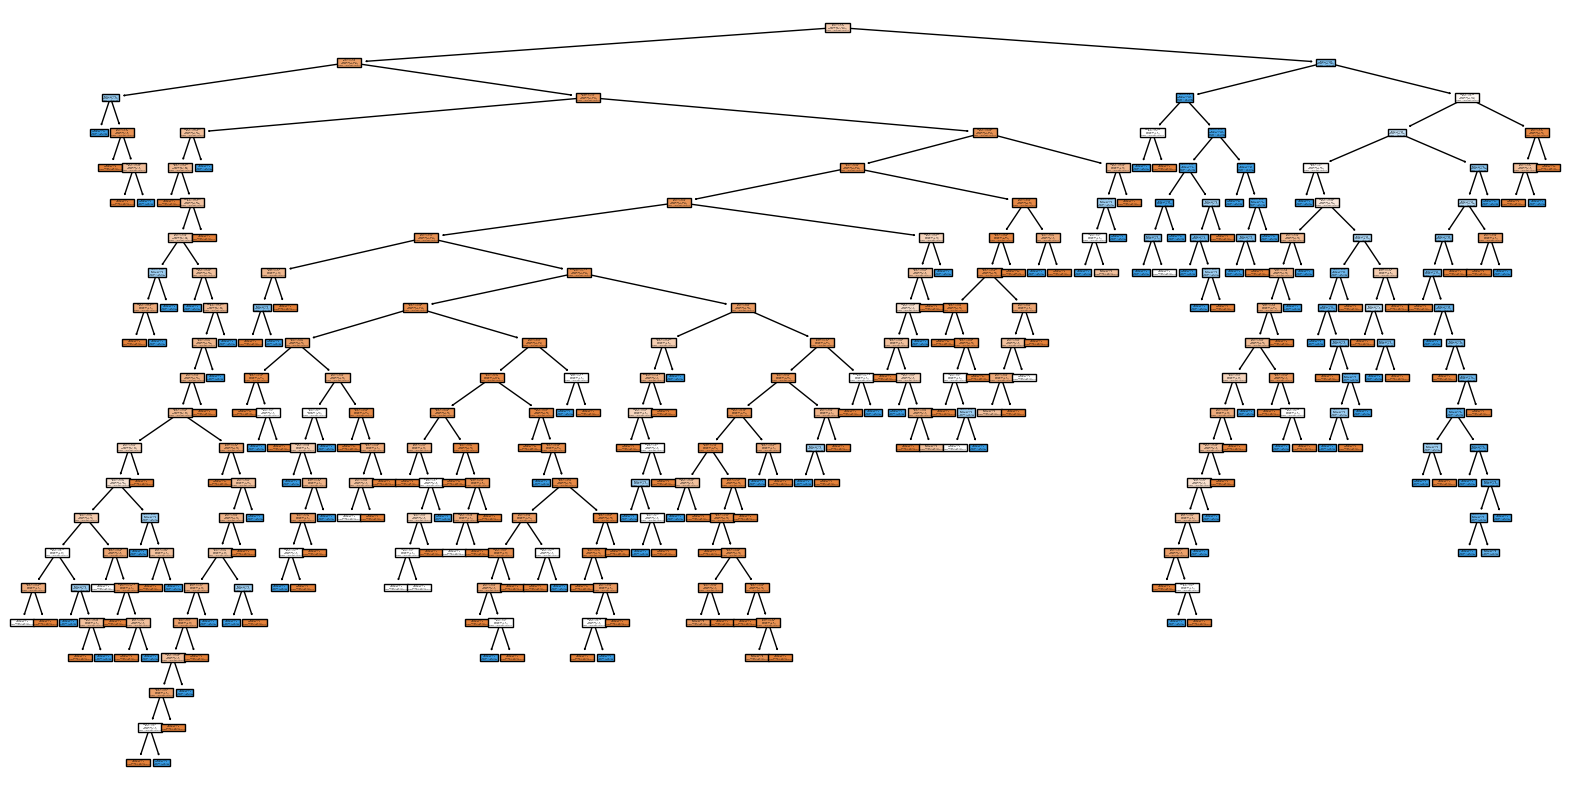

In [9]:
# Visualize the Decision Tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Did Not Survive', 'Survived'])
plt.show()